Лабораторна робота №1 (Варіант 3)
1.	Сформувати тестову вибірку зображень з вихідного пакета;
2.	Для кожного каналу кольору кожного зображення з тестового пакета обчислити наступні характеристики:
a.	Максимальна / мінімальне значення;
b.	 Математичне сподівання і дисперсію;
c.	 Медіану значень, інтерквартільний розмах;
d.	 Коефіцієнти асиметрії та ексцесу (нормалізований);
3.	Для кожного каналу кольору кожного зображення з тестового пакета побудувати гістограму значень яскравості пікселів;
4.	 Провести апроксимацію отриманих гістограм з використанням відомих імовірнісних розподілів, визначити найкращу апроксимацію;
5.	 Побудувати розподіл типів використаних імовірнісних розподілів для яких досягається мінімальне значення помилки апроксимації з п.4.


In [2]:
from os import listdir

from matplotlib import image as img
import matplotlib.pyplot as plt

import random
import numpy as np
import seaborn as sns
from scipy import stats

In [11]:
# 1.generate a test sample of images from the source package

np.random.RandomState(3)
sample_size = 250
indexes = np.random.choice(range(25000), sample_size)
images = list()
for i in range(sample_size):
    filename = 'im' + str(indexes[i]) + '.jpg'
    img_data = img.imread('.../downloads/mirflickr/' + filename)
    images.append(img_data)

print(f'{sample_size} images uploaded, processing begins...')

values = np.zeros((3, 256))
for image in images:
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            values[0][image[i][j][0]] += 1
            values[1][image[i][j][1]] += 1
            values[2][image[i][j][2]] += 1
            
print('all images processed')

250 images uploaded, processing begins...
all images processed


In [12]:
# 2.for each color channel of each image in the test package, calculate the following characteristics: 
# a.maximum / minimum value

colors = {
    'RED': 0,
    'GREEN': 1,
    'BLUE': 2
}

for color in colors:
    print(color + ':')
    for i in range(255, 0, -1):
        if (values[colors[str(color)]][i] != 0):
            print(f'maximum value - {i}, ')
            break
    for i in range(0, 255):
        if (values[colors[str(color)]][i] != 0):
            print(f'minimum value - {i}')
            break

RED:
maximum value - 255, 
minimum value - 0
GREEN:
maximum value - 255, 
minimum value - 0
BLUE:
maximum value - 255, 
minimum value - 0


In [38]:
# b.expectation and variance

expectations = {
    'RED': 0,
    'GREEN': 0,
    'BLUE': 0  
}

variances = {
    'RED': 0,
    'GREEN': 0,
    'BLUE': 0  
}

for color in colors:
    print(color + ':')
    sum_values = sum(values[colors[str(color)]])
    expectation = 0
    for i in range(len(values[colors[str(color)]])):
        p = (values[colors[str(color)]][i] / sum_values)
        expectation += p * i
    variance = 0
    for i in range(len(values[colors[str(color)]])):
        p = (values[colors[str(color)]][i] / sum_values)
        variance += p * ((i - expectation) ** 2)
        
    expectations[str(color)] = expectation
    variances[str(color)] = variance
    print(f'expectation - {expectation}')
    print(f'variance - {variance}')
    

RED:
expectation - 113.60443421273365
variance - 6248.877506995998
GREEN:
expectation - 107.30682031381062
variance - 5613.174370057347
BLUE:
expectation - 98.59806754867645
variance - 5781.50450273308


In [35]:
# c.median values, interquartile range


def median_values(array):
    summa_values = sum(array)
    summa = 0
    for index in range(len(array)):
        summa += array[index]
        if (summa > (summa_values / 2)):
            return index - 1
        if (summa == (summa_values / 2)):
            return (2 * index + 1) / 2

def interquartile_range(array, interquartile):
    summa_values = sum(array)
    summa = 0
    for i in range(len(array)):
        prev_summa = summa
        p = array[i] /  summa_values
        summa += p
        if (summa > interquartile):
            if (interquartile - prev_summa < summa - interquartile):
                return i - 1
            elif (interquartile - prev_summa > summa - interquartile):
                return i
            else:
                return (2 * i - 1) / 2

for color in colors:
    print(color + ':')
    print(f'median values - {median_values(values[colors[str(color)]])}')
    print(f'interquartile range - {interquartile_range(values[colors[str(color)]], 0.75) - interquartile_range(values[colors[str(color)]], 0.25)}')


RED:
median values - 110
interquartile range - 137
GREEN:
median values - 102
interquartile range - 125
BLUE:
median values - 89
interquartile range - 130


In [49]:
# d. сoefficients of asymmetry and excess

def finder(array, expectation, power):
    summa_values = sum(array)
    final = 0
    for i in range(len(array)):
        p = (array[i] / summa_values)
        final += p * ((i - expectation) ** power)
    return final


for color in colors:
    print(color + ':')
    asymmetry = finder(values[colors[color]], expectations[color], 3) / (variances[color] ** (3 / 2))
    excess = finder(values[colors[color]], expectations[color], 4) / (variances[color] ** 2) - 3
    print(f'asymmetry - {asymmetry}')
    print(f'excess - {excess}')

RED:
asymmetry - 0.1608408344525885
excess - -1.202426131141161
GREEN:
asymmetry - 0.2596345757144237
excess - -1.046134480329933
BLUE:
asymmetry - 0.3781474508728697
excess - -1.0105627217737896


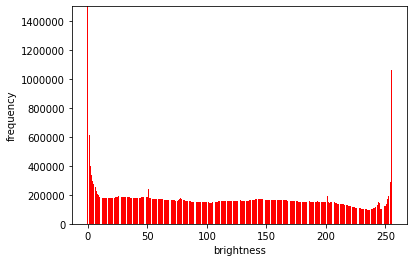

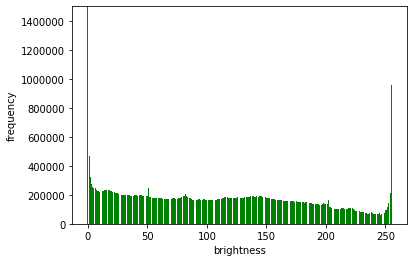

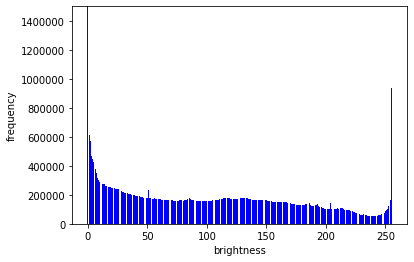

In [45]:
# 3.for each color channel of each image from the test package, construct a histogram of pixel brightness values

x = range(256)

for color in colors:
    plt.bar(x, values[colors[color]], color=color.lower())
    plt.xlabel('brightness')
    plt.ylabel('frequency')
    plt.ylim(top=1500000)
    plt.show()

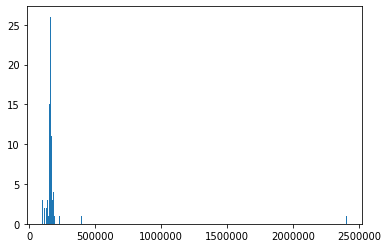

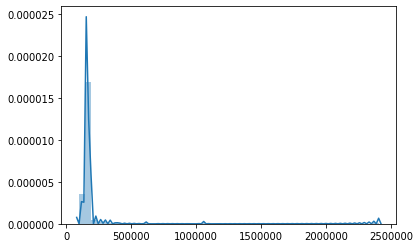

In [47]:
test = values[colors['RED']]
plt.hist(test, bins=1000)
plt.show()

X, Y = sns.distplot(np.ravel(test)).get_lines()[0].get_data()

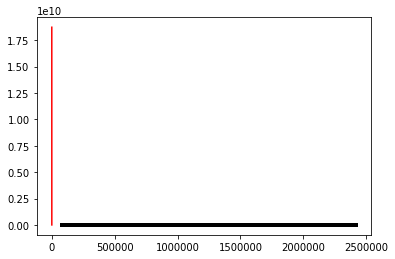

In [54]:
test = np.ravel(test)
xt = plt.xticks()[0]
x_min, x_max = min(xt), max(xt)
l = np.linspace(0, 255, len(X))

m, s = stats.norm.fit((X, Y))
pg = stats.norm.pdf(l, m, s)
plt.plot(l, pg, label="norm", color='black')
plt.plot(X, Y, color='black', linewidth=4)

plt.plot(l, pg, label="norm")
ag, bg, cg = stats.gamma.fit((X, Y))
pgamma = stats.gamma.pdf(lnspc, ag, bg, cg)
plt.plot(lnspc, pgamma, label="gamma", color='blue')

ab, bb, cb, db = stats.beta.fit((X, Y))
pbeta = stats.beta.pdf(l, ab, bb, cb, db)
plt.plot(l, pbeta, label="beta", color='red')

plt.show()